# MajorContract_Offset
This file  the QishiQR/Utils/MajorContract_Offsets.py

In [1]:
import os
import fnmatch
import pandas as pd
from datetime import *
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import sys
# sys.path.append('/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng')
sys.path.insert(0,'/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng')
# os.chdir('/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng')
from Simengs_utils.MajorContract_sq import MajorContracts
# importlib.reload(Simengs_utils.MajorContract_sq)


In [3]:
freq = 5
offsets = [0.1+i for i in range(5)]
ru_Major = MajorContracts(symbol='ru', training_end_date='2016-6-30', 
                          topdir='/Users/simone/Documents/Projects/Qishi QR/tick2016',
                          maturity={'1605':['2016-1-4','2016-5-16'],
                                    '1609':['2016-1-4','2016-9-19'],
                                    '1701':['2016-1-18','2016-12-30'],
                                    '1705':['2016-5-17', '2016-12-30']},
                          
                          transitions={'1605':['2016-01-04','2016-03-17'],
                                    '1609':['2016-03-18','2016-08-01'],
                                    '1701':['2016-8-2','2016-11-23'],
                                    '1705':['2016-11-24', '2017-12-30']},
                         freq = freq, offset = offsets)
ru_train_mj, ru_test_mj, ru_PT_train_on_mj = ru_Major.create_major_overlap()


ru1605 /Users/simone/Documents/Projects/Qishi QR/tick2016/ru
Parallel mode on.
Parallel mode on.
ID = 1605 ,  trade_range= ['2016-1-4', '2016-5-16'] , transition=[ 2016-01-04 00:00:00 , 2016-03-17 00:00:00 ]
probability table:  20160104 20160316
probability table:  20160104 20160316
probability table:  20160104 20160316
probability table:  20160104 20160316
probability table:  20160104 20160316
ru1609 /Users/simone/Documents/Projects/Qishi QR/tick2016/ru
Parallel mode on.
Parallel mode on.
ID = 1609 ,  trade_range= ['2016-1-4', '2016-9-19'] , transition=[ 2016-03-18 00:00:00 , 2016-08-01 00:00:00 ]
probability table:  20160318.0 20160630.0
probability table:  20160318.0 20160630.0
probability table:  20160318.0 20160630.0
probability table:  20160318.0 20160630.0
probability table:  20160318.0 20160630.0
ru1701 /Users/simone/Documents/Projects/Qishi QR/tick2016/ru
Parallel mode on.
Parallel mode on.
ID = 1701 ,  trade_range= ['2016-1-18', '2016-12-30'] , transition=[ 2016-08-02 00:00:0

In [2]:
for offset in ru_test_mj.keys():
    ru_test_mj[offset].to_csv(r'../Output/ru_major_test/ru_major_test_' + str(freq) + '_' + offset + '.csv')
for contract in ['1605', '1609']:
    ru_PT_train_on_mj[contract].to_csv(r'../Output/Strategy/ru_'+ contract +
                                       '_major_strategy_' + str(freq) + '_AllOffset'  + '.csv', index=False)

### combine all probability table

In [3]:
import os
import pandas as pd
import fnmatch

filepath = "/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng/Output/Strategy"
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "ru_*_major_strategy_5_*.csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
             
        slm = slm.append(data[['prior', '0', '1', '2', 'total']])
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Output/Strategy/ru_major_strategy.csv')
print(slm.head())

ru_1605_major_strategy_5_AllOffset.csv
ru_1609_major_strategy_5_AllOffset.csv
   prior     0      1      2  total signal
0      p  4710  17692  18173  40575      2
1     p0   613   2029   2066   4708      2
2    p00    79    275    259    613      1
3   p000    11     35     33     79      1
4  p0000     2      5      4     11      1


## Backtesting -- Train on Major, Test on Major

In [2]:
import os
import fnmatch
import pandas as pd
from datetime import *
import matplotlib.pyplot as plt
import pandas as pd
import sys
import importlib 

sys.path.insert(0,'/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng')

from Simengs_backtesting.lm_validation_sq import LmValidation
slm = pd.read_csv('/Users/simone/Documents/GitHub/QishiQR_Folk/Simeng/Output/Strategy/ru_major_strategy.csv')


### all

ru_major_test_5_2.1.csv
ru_major_test_5_0.1.csv
ru_major_test_5_4.1.csv
ru_major_test_5_1.1.csv
ru_major_test_5_3.1.csv


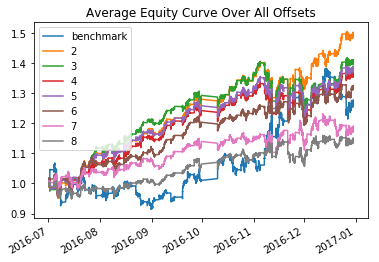

   Annualized Volatility(log)  Average Daily Return  Average Negative Return  \
0                    0.346067              1.004126                 0.996806   
1                    0.372358              1.003348                 0.996684   
2                    0.365244              1.003035                 0.996607   
3                    0.373209              1.003174                 0.996605   
4                    0.377197              1.002667                 0.996606   
5                    0.364227              1.001560                 0.996717   
6                    0.371804              1.001233                 0.997019   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 1.001835                  1.000107              0.943862   
1                 1.001818                  1.000091              0.943862   
2                 1.001859                  1.000083              0.943901   
3                 1.001855                  1.0

In [3]:
lm_validation = LmValidation(slm, symbol='ru_major', start='2016-7-1', end='2017-1-1',
                             data_dir=r'../Output/ru_major_test/',
                             valid_dir=r'../Output/Validate_ru_train_mj', max_order=7, offsets_average=True, n_offsets=5)
average_benchmart = lm_validation.run()

### Contract 1609, end at 8/1

ru_major_test_5_2.1.csv
ru_major_test_5_0.1.csv
ru_major_test_5_4.1.csv
ru_major_test_5_1.1.csv
ru_major_test_5_3.1.csv


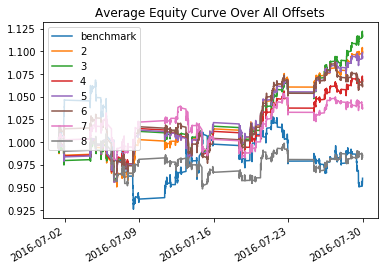

   Annualized Volatility(log)  Average Daily Return  Average Negative Return  \
0                    0.343978              1.004759                 0.996676   
1                    0.370122              1.005622                 0.996609   
2                    0.351432              1.003257                 0.996511   
3                    0.367546              1.004491                 0.996531   
4                    0.386345              1.002989                 0.996470   
5                    0.375711              1.001783                 0.996629   
6                    0.362218              0.999201                 0.996787   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 1.001999                  1.000121              0.975366   
1                 1.002003                  1.000152              0.975623   
2                 1.002024                  1.000088              0.975189   
3                 1.002024                  1.0

In [4]:
# transitions={'1605':['2016-01-04','2016-03-17'],
#                                     '1609':['2016-03-18','2016-08-01'],
#                                     '1701':['2016-8-2','2016-11-23'],
#                                     '1705':['2016-11-24', '2017-12-30']},
lm_validation = LmValidation(slm, symbol='ru_major', start='2016-7-1', end='2016-8-2',
                             data_dir=r'../Output/ru_major_test/',
                             valid_dir=r'../Output/Validate_ru_train_mj', max_order=7, offsets_average=True, n_offsets=5)
average_benchmart = lm_validation.run()

### Contract 1701, (8/2/2016 - 11/23/2016)

ru_major_test_5_2.1.csv
ru_major_test_5_0.1.csv
ru_major_test_5_4.1.csv
ru_major_test_5_1.1.csv
ru_major_test_5_3.1.csv


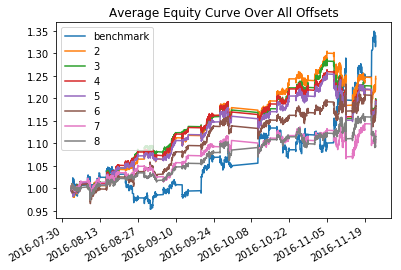

   Annualized Volatility(log)  Average Daily Return  Average Negative Return  \
0                    0.315304              1.003368                 0.997147   
1                    0.341425              1.002691                 0.997007   
2                    0.331190              1.002653                 0.996948   
3                    0.342670              1.002621                 0.996943   
4                    0.325586              1.002479                 0.996982   
5                    0.321840              1.001733                 0.997083   
6                    0.344716              1.001565                 0.997392   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 1.001598                  1.000087              0.943862   
1                 1.001581                  1.000074              0.943862   
2                 1.001625                  1.000073              0.943901   
3                 1.001621                  1.0

In [5]:
# transitions={'1605':['2016-01-04','2016-03-17'],
#                                     '1609':['2016-03-18','2016-08-01'],
#                                     '1701':['2016-8-2','2016-11-23'],
#                                     '1705':['2016-11-24', '2017-12-30']},
lm_validation = LmValidation(slm, symbol='ru_major', start='2016-8-2', end='2016-11-24',
                             data_dir=r'../Output/ru_major_test/',
                             valid_dir=r'../Output/Validate_ru_train_mj', max_order=7, offsets_average=True, n_offsets=5)
average_benchmart = lm_validation.run()

### Contract 1705, (11/24/2016 - 12/30/2016)

ru_major_test_5_2.1.csv
ru_major_test_5_0.1.csv
ru_major_test_5_4.1.csv
ru_major_test_5_1.1.csv
ru_major_test_5_3.1.csv


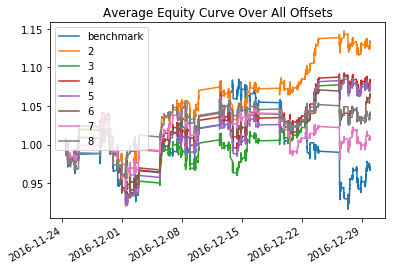

   Annualized Volatility(log)  Average Daily Return  Average Negative Return  \
0                    0.430019              1.005165                 0.995971   
1                    0.459639              1.002984                 0.995901   
2                    0.465405              1.003224                 0.995804   
3                    0.461735              1.003007                 0.995791   
4                    0.498878              1.002506                 0.995699   
5                    0.466454              1.000426                 0.995749   
6                    0.461212              1.001616                 0.996151   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 1.002369                  1.000133              0.972325   
1                 1.002340                  1.000079              0.971562   
2                 1.002374                  1.000085              0.970070   
3                 1.002368                  1.0

In [6]:
# transitions={'1605':['2016-01-04','2016-03-17'],
#                                     '1609':['2016-03-18','2016-08-01'],
#                                     '1701':['2016-8-2','2016-11-23'],
#                                     '1705':['2016-11-24', '2017-12-30']},
lm_validation = LmValidation(slm, symbol='ru_major', start='2016-11-24', end='2016-12-30',
                             data_dir=r'../Output/ru_major_test/',
                             valid_dir=r'../Output/Validate_ru_train_mj', max_order=7, offsets_average=True, n_offsets=5)
average_benchmart = lm_validation.run()